# Preparing a Data Set for Modeling

In [100]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

## Part 1. Build DataFrame and Define ML Problem

In [101]:
filename = os.path.join(os.getcwd(), "..", "data", "censusData_full.csv")

In [102]:
df = pd.read_csv(filename)

#### Inspect the Data

In [103]:
df.shape

(32561, 15)

In [104]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


#### Define the Label

In [105]:
df['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64

#### Identify Features

In [106]:
features = [column for column in df.columns if column != 'education-num']

## Part 2. Clean Data

### a. Handle Outliers - Winsorization

In [107]:
import scipy.stats as stats

In [108]:
df['education_years'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

In [109]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income,education_years
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13


In [110]:
difference_edu = df['education-num'] - df['education_years']
difference_edu.unique()

array([ 0, -1, -2])

### b. Handle Missing Data

####  Identifying missingness

In [111]:
df.isnull().values.any()

nan_count = np.sum(df.isnull(), axis = 0)

nan_count

age                 162
workclass          1836
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex_selfID            0
capital-gain          0
capital-loss          0
hours-per-week      325
native-country      583
income                0
education_years       0
dtype: int64

In [112]:
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()

#### Replacing the missing values with mean values of the column

In [113]:
mean_ages=df['age'].mean()
mean_hours=df['hours-per-week'].mean()
df['age'] = df['age'].fillna(value=mean_ages)
df['hours-per-week'] = df['hours-per-week'].fillna(value=mean_hours)

In [114]:
np.sum(df['age'].isnull(), axis = 0)

0

## Part 3. Explore Data

#### Identify Correlations
In particular, we will focus on identifying which features in the data have the highest correlation with the label. 

In [115]:
df.select_dtypes(include=['number']).corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_years
age,1.000000,-0.076085,0.036685,0.124705,0.057478,0.066572,0.038549
fnlwgt,-0.076085,1.000000,-0.043195,-0.002234,-0.010252,-0.018047,-0.042134
education-num,0.036685,-0.043195,1.000000,0.167089,0.079923,0.146553,0.999182
capital-gain,0.124705,-0.002234,0.167089,1.000000,-0.055138,0.100995,0.168202
capital-loss,0.057478,-0.010252,0.079923,-0.055138,1.000000,0.054202,0.080453
hours-per-week,0.066572,-0.018047,0.146553,0.100995,0.054202,1.000000,0.147275
education_years,0.038549,-0.042134,0.999182,0.168202,0.080453,0.147275,1.000000


In [116]:
exclude = ['education_years','education-num']
df.select_dtypes(include=['number']).corr()['education_years'].drop(exclude, axis = 0)

age               0.038549
fnlwgt           -0.042134
capital-gain      0.168202
capital-loss      0.080453
hours-per-week    0.147275
Name: education_years, dtype: float64

In [117]:
corrs = df.select_dtypes(include=['number']).corr()['education_years'].drop(exclude, axis = 0)

corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

capital-gain      0.168202
hours-per-week    0.147275
capital-loss      0.080453
age               0.038549
fnlwgt           -0.042134
Name: education_years, dtype: float64

In [118]:
top_two_corr = list(corrs_sorted.index[0:2])

top_two_corr

['capital-gain', 'hours-per-week']

Now that we have identified the two features that have the highest correlation with the label, let us find the correlation between both features.

In [119]:
corr_features = df[top_two_corr[0]].corr(df[top_two_corr[1]])

corr_features

0.1009946608371659

#### Bivariate Plotting: Produce Plots for the Label and Its Top Correlates

Let us visualize our data.

We will use the `scatterplot()` function in `seaborn` to plot the relationships between the two features we just identified and the label.

We will create a DataFrame named ` df_corr1` that contains two columns from DataFrame `df`: the label, and the first of the two columns which correlate with it the most:

In [120]:
df_corr1 = pd.DataFrame({'capital_gain': df['capital-gain'], 'education_years': df['education_years']})
df_corr1

,capital_gain,education_years
0,2174,13
1,0,13
2,0,9
3,0,7
4,0,13
...,...,...
32556,0,12
32557,0,9
32558,0,9
32559,0,9


<Axes: xlabel='education_years', ylabel='capital_gain'>

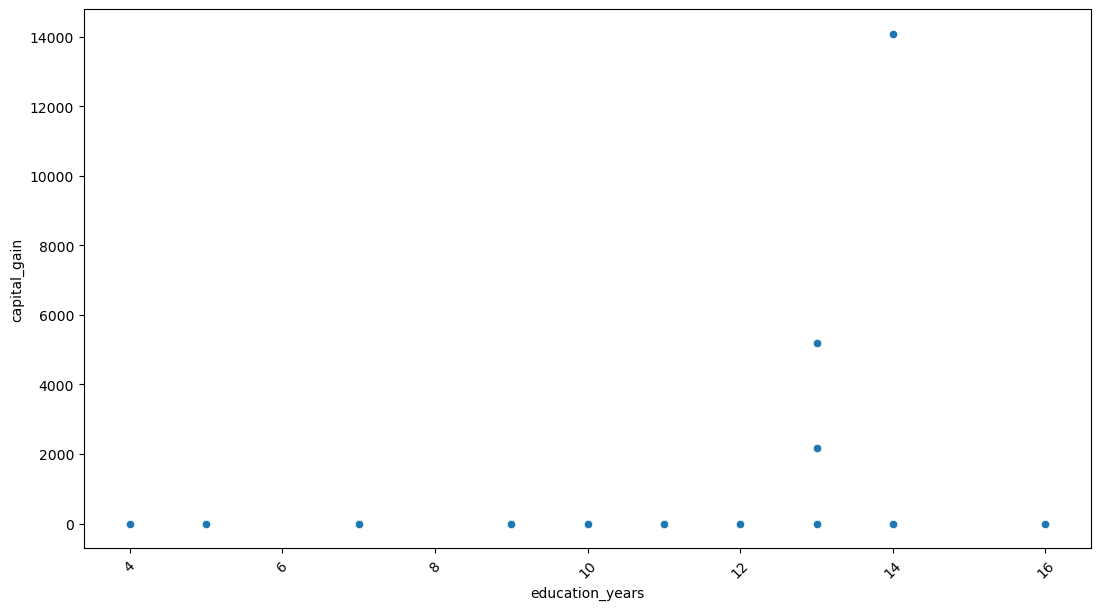

In [121]:
fig1 = plt.figure(figsize=(13,7)) 
t1 = plt.xticks(rotation=45)
sns.scatterplot(data=df_corr1.iloc[:50], x='education_years', y='capital_gain')

In [122]:
df_corr2 = pd.DataFrame({'hours_per_week': df['hours-per-week'], 'education_years': df['education_years']})

df_corr2

,hours_per_week,education_years
0,40.0,13
1,13.0,13
2,40.0,9
3,40.0,7
4,40.0,13
...,...,...
32556,38.0,12
32557,40.0,9
32558,40.0,9
32559,20.0,9


<Axes: xlabel='education_years', ylabel='hours_per_week'>

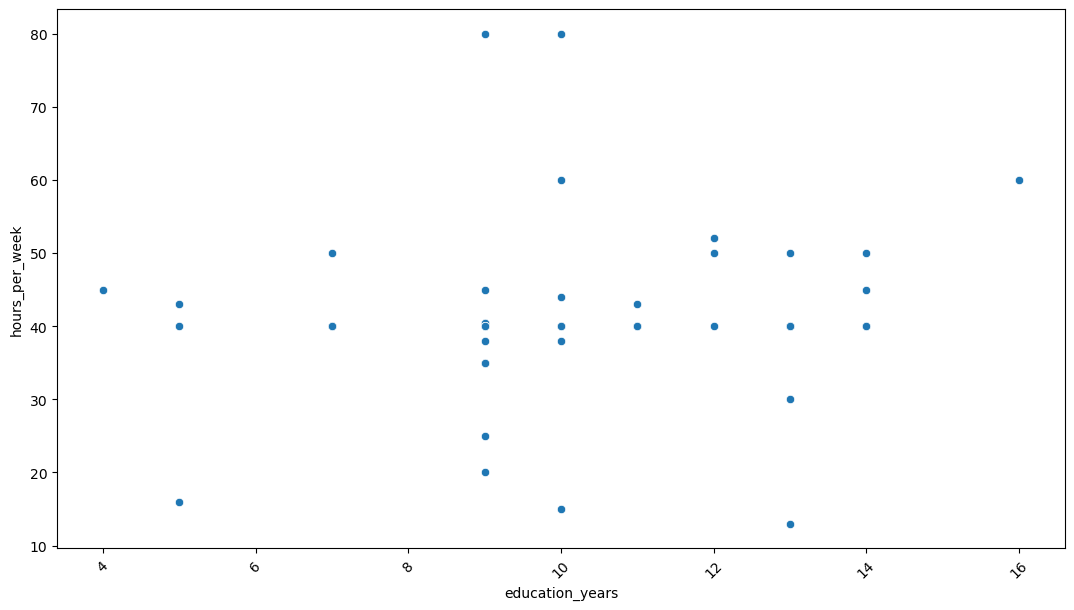

In [123]:
fig2 = plt.figure(figsize=(13,7)) 
t2 = plt.xticks(rotation=45)
sns.scatterplot(data=df_corr2.iloc[:50], x='education_years', y='hours_per_week')

In [124]:
df_corr3 = pd.DataFrame({'hours_per_week': df['hours-per-week'], 'capital_gain': df['capital-gain']})

df_corr3

,hours_per_week,capital_gain
0,40.0,2174
1,13.0,0
2,40.0,0
3,40.0,0
4,40.0,0
...,...,...
32556,38.0,0
32557,40.0,0
32558,40.0,0
32559,20.0,0


<Axes: xlabel='hours_per_week', ylabel='capital_gain'>

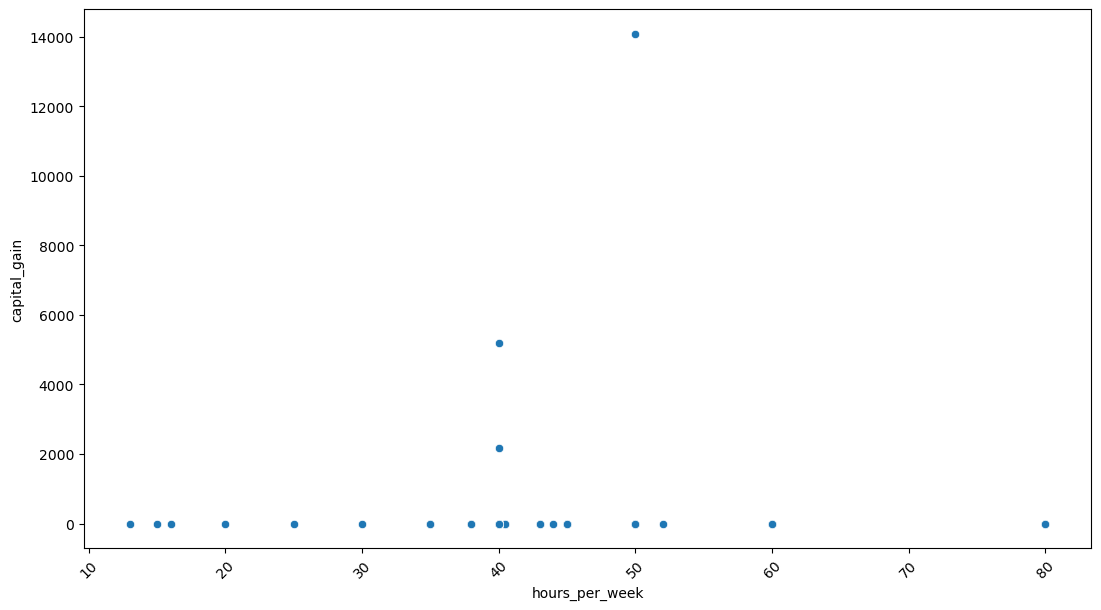

In [125]:
fig3 = plt.figure(figsize=(13,7)) 
t3 = plt.xticks(rotation=45)
sns.scatterplot(data=df_corr3.iloc[:50], x='hours_per_week', y='capital_gain')

So far we have been visualizing a subset of the data. Let's now create a visualization of all of the data.


In [126]:
df_corrs = pd.DataFrame({'hours_per_week': df['hours-per-week'], 'capital_gain': df['capital-gain'], 'education_years': df['education_years']})

df_corrs

,hours_per_week,capital_gain,education_years
0,40.0,2174,13
1,13.0,0,13
2,40.0,0,9
3,40.0,0,7
4,40.0,0,13
...,...,...,...
32556,38.0,0,12
32557,40.0,0,9
32558,40.0,0,9
32559,20.0,0,9


We will use the `pairplot()` function in `seaborn` to plot the data in `df_corrs`. 

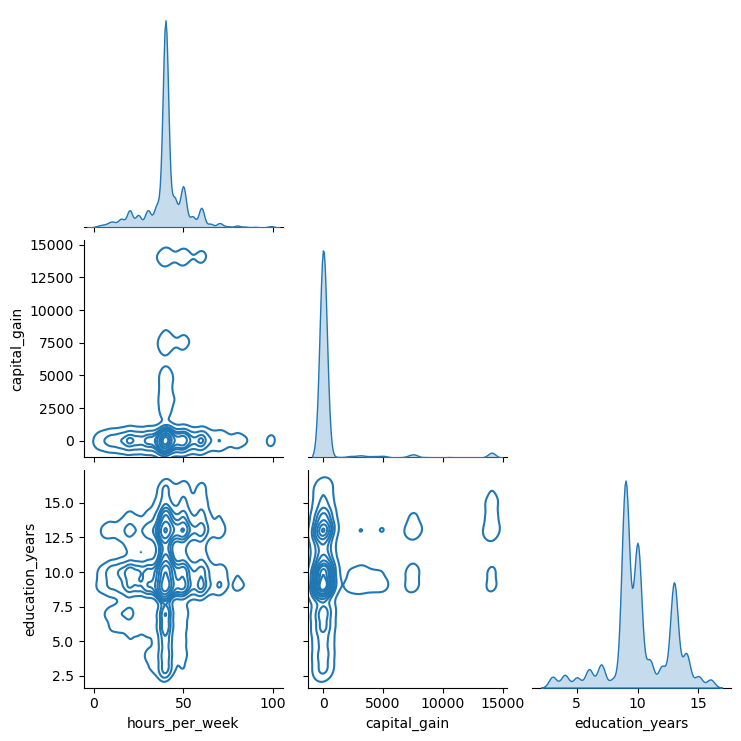

In [127]:
# `kind = 'kde'` to specify the *kernel density estimator* as the *kind* of the plot.
# `corner=True` to make sure we don't plot redundant (symmetrical) plots.
sns.pairplot(data=df_corrs, kind='kde', corner=True)